# Exercise 3:

Use and experience methods from previous lessons with given data. Try to search for other pandas methods to analyze the data such as `groupby()` and `query()`. Write functions for repetitive tasks.

TODOs:
- See the spread of pandemic in different countries.
- Plot graphs for Reproduction Rate for different countries side by side or in the same graph.
- Check correlation between deaths and recoveries.
- Compare recoveries between countries.
- Are there any outliers (anomalies)?

[Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# You can find covid related data under project's data folder 
base_url = "../data/covid/"
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"

In [4]:
df_confirmed = pd.read_csv(infected_dataset_url)
df_recovered = pd.read_csv(recovered_dataset_url)
df_deaths = pd.read_csv(deaths_dataset_url)

In [5]:
df_confirmed.head

<bound method NDFrame.head of     Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN  Sao Tome and Principe   0.186360   6.613081        0   
262            NaN                  Yemen  15.552727  48.516388        0   
263            NaN                Comoros -11.645500  43.333300        0   
264            NaN             Tajikistan  38.861034  71.276093        0   
265            NaN                Lesotho -29.609988  28.233608        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/

In [6]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,925,938,945,960,980,1001,1034,1039,1044,1055
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,741,744,751,757,759,780,781,781,781,789
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,38,38,40,41,42,61,61,64


In [9]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,327,357,369,384,405,426,446,451,471,478
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,34,34,34,34,34,35,36,36,36,36
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,698,707,715,724,732,741,751,760,767,777
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,5,5,6,6,6


In [36]:
# Her ülkenin toplam vaka sayısı (en son tarih)
total_confirmed_by_country = df_confirmed.groupby("Country/Region").sum(numeric_only=True).iloc[:, -1].sort_values(ascending=False)
#verileri groupby ile ülke adına göre grupladık. 
# #sum(numeric_only=True): Her ülke için sütunlardaki (tarihlerin) vaka sayılarını toplar.
#iloc[:, -1]: Son sütunu (yani en güncel tarihi) seçer.
#sort_values(ascending=False): En çoktan en aza doğru sıralar.

# İlk 10 ülkeyi al
top_10_countries = total_confirmed_by_country.head(10)
top_10_countries.head(10)






Country/Region
US                2114026
Brazil             888271
Russia             536484
India              343091
United Kingdom     298315
Spain              244109
Italy              237290
Peru               232992
France             194305
Iran               189876
Name: 6/15/20, dtype: int64

1.madde

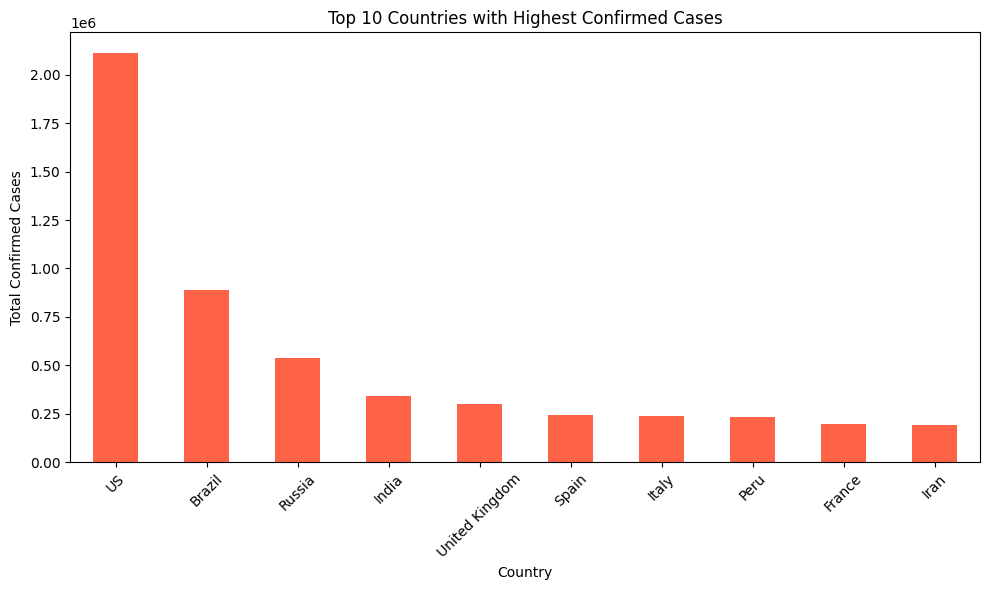

In [37]:
plt.figure(figsize=(10,6))
top_10_countries.plot(kind="bar", color="tomato")
plt.title("Top 10 Countries with Highest Confirmed Cases")
plt.ylabel("Total Confirmed Cases")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. madde

In [63]:


def plot_reproduction_rate(country, df_confirmed): 
    #country: Grafik çizmek istediğin ülke ismi 
    #df_confirmed: Tüm ülkelerin günlük doğrulanmış vaka verilerini içeren DataFrame.
    
    # Sadece tarih kolonlarını al (Province/State, Country/Region, Lat, Long)
    date_columns = df_confirmed.columns[4:]
    
    # Ülkenin tüm bölgeleri varsa toplayarak tek ülke haline getiriyoruz
    country_data = df_confirmed[df_confirmed["Country/Region"] == country]
    total_cases = country_data[date_columns].sum()

    # Günlük yeni vaka sayısı
    daily_new_cases = total_cases.diff().fillna(0)

    # Yayılma oranı (bugünkü vaka / dünkü vaka)
    reproduction_rate = daily_new_cases / daily_new_cases.shift(1)
    reproduction_rate = reproduction_rate.replace([float("inf"), -float("inf")], 0).fillna(0)

    # Grafik çizimi
    plt.figure(figsize=(14, 5))
    plt.plot(reproduction_rate.index, reproduction_rate.values, color='crimson', linewidth=2)
    plt.title(f"{country} - Reproduction Rate Over Time", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Reproduction Rate")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Yalnızca bazı tarihleri göster (her 14 günde bir mesela)
    ticks_to_use = reproduction_rate.index[::14]
    plt.xticks(ticks_to_use)

    plt.tight_layout()
    plt.show()


    


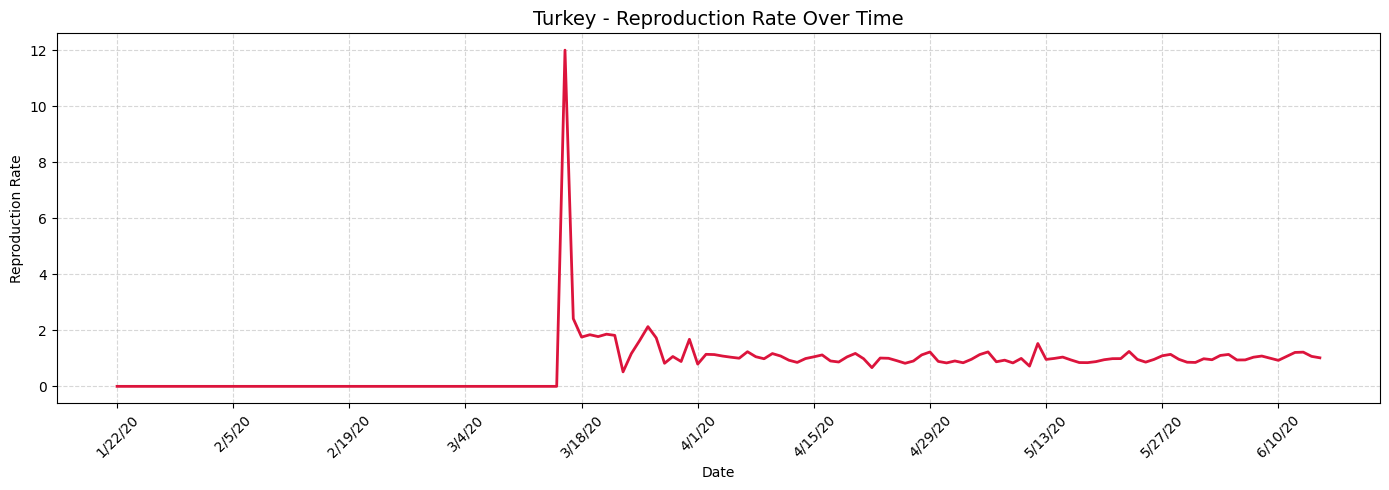

In [64]:
plot_reproduction_rate("Turkey", df_confirmed)


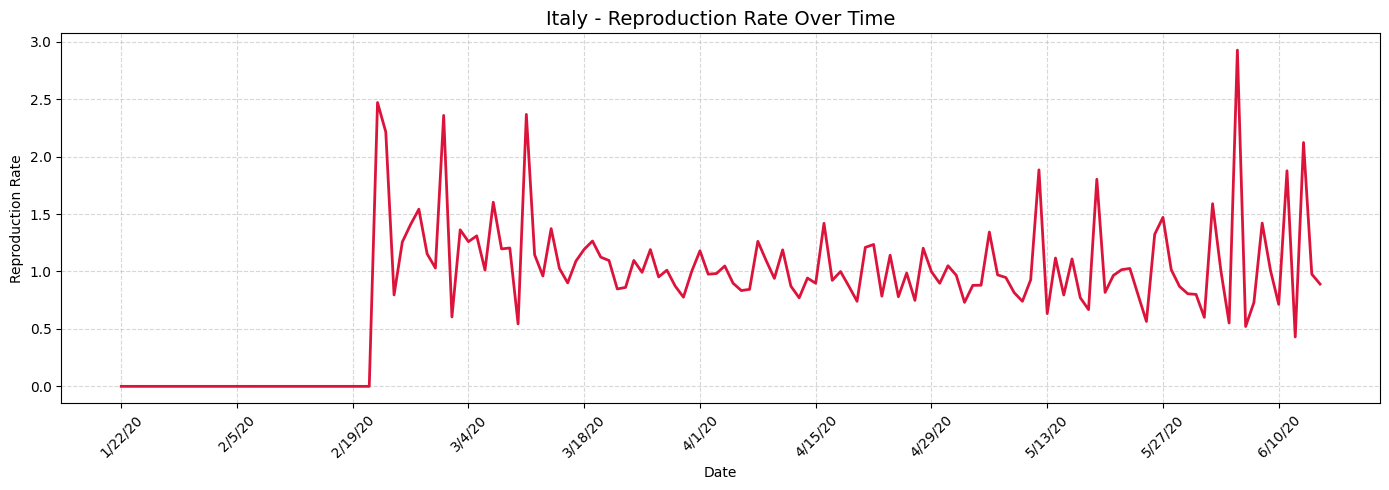

In [53]:
plot_reproduction_rate("Italy", df_confirmed)


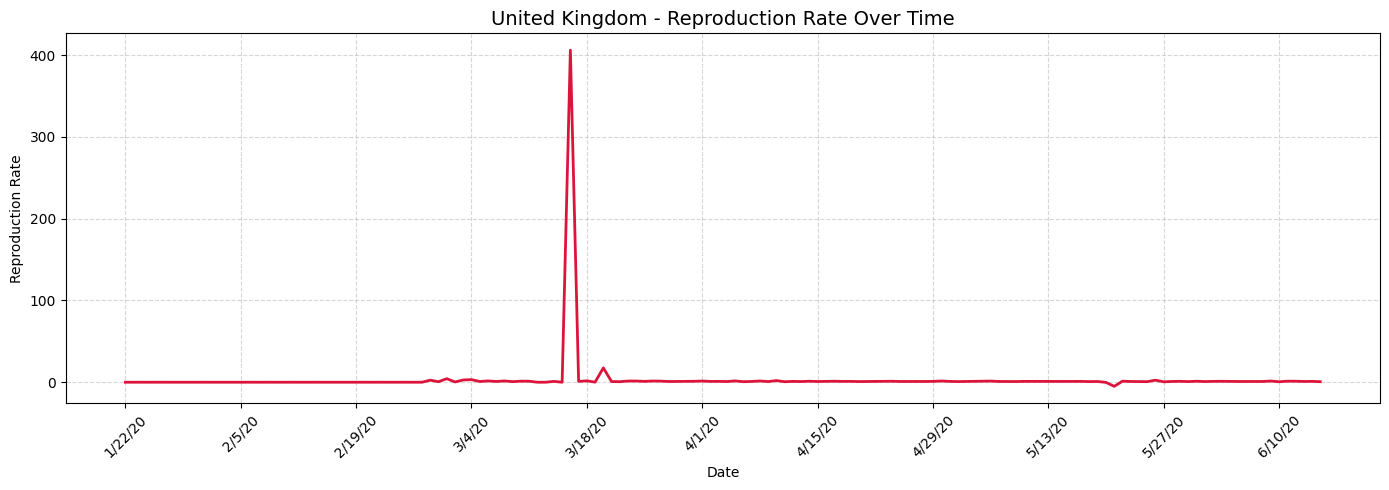

In [55]:
plot_reproduction_rate("United Kingdom", df_confirmed)

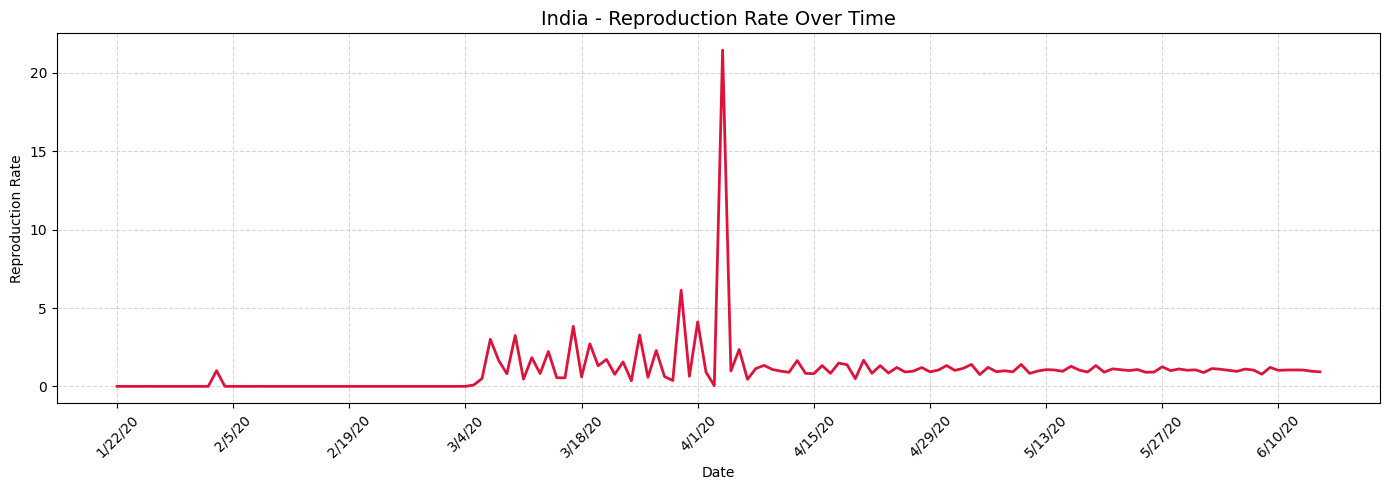

In [56]:
plot_reproduction_rate("India", df_confirmed)

In [60]:
import matplotlib.pyplot as plt

def plot_reproduction_rates(countries, df):
    plt.figure(figsize=(14, 6))

    for country in countries:
        country_data = df[df["Country/Region"] == country].iloc[:, 4:].sum()
        daily_diff = country_data.diff().fillna(0)
        previous_day = country_data.shift(1).replace(0, 1)  # 0'ı 1 yaparak bölme hatasını önledik
        reproduction_rate = daily_diff / previous_day
        plt.plot(reproduction_rate.values, label=country)

    plt.title("Reproduction Rate Over Time")
    plt.xlabel("Days")
    plt.ylabel("Reproduction Rate")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


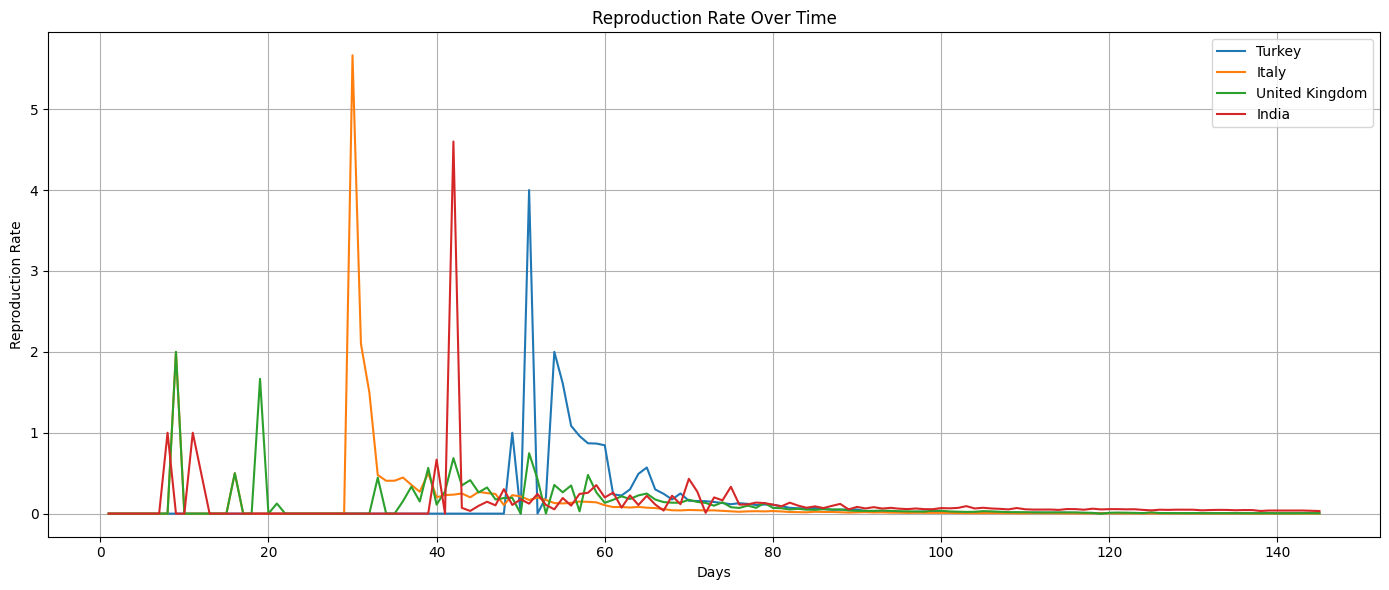

In [62]:
plot_reproduction_rates(["Turkey", "Italy", "United Kingdom", "India"], df_confirmed)


3.madde

In [71]:
# Ülke bazında toplam ölümler ve iyileşmeler (en son tarih)
total_deaths = df_deaths.groupby("Country/Region").sum(numeric_only=True).iloc[:, -1]
total_recovered = df_recovered.groupby("Country/Region").sum(numeric_only=True).iloc[:, -1]

# Ortak ülkeler için dataframe
df_compare = pd.DataFrame({
    "Deaths": total_deaths,
    "Recovered": total_recovered
}).dropna()

# Korelasyon katsayısı
correlation = df_compare["Deaths"].corr(df_compare["Recovered"])
correlation




np.float64(0.8151250882450902)

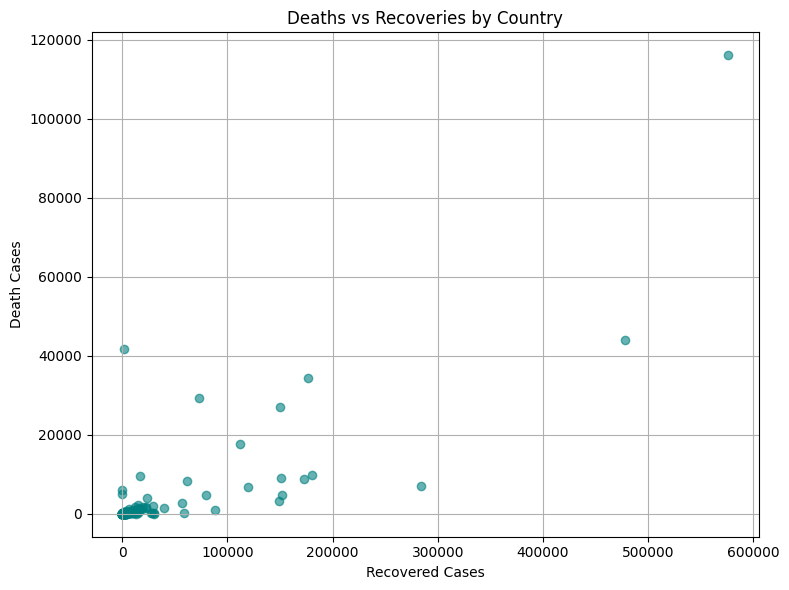

In [72]:
# Scatter grafiği
plt.figure(figsize=(8,6))
plt.scatter(df_compare["Recovered"], df_compare["Deaths"], alpha=0.6, color="teal")
plt.title("Deaths vs Recoveries by Country")
plt.xlabel("Recovered Cases")
plt.ylabel("Death Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

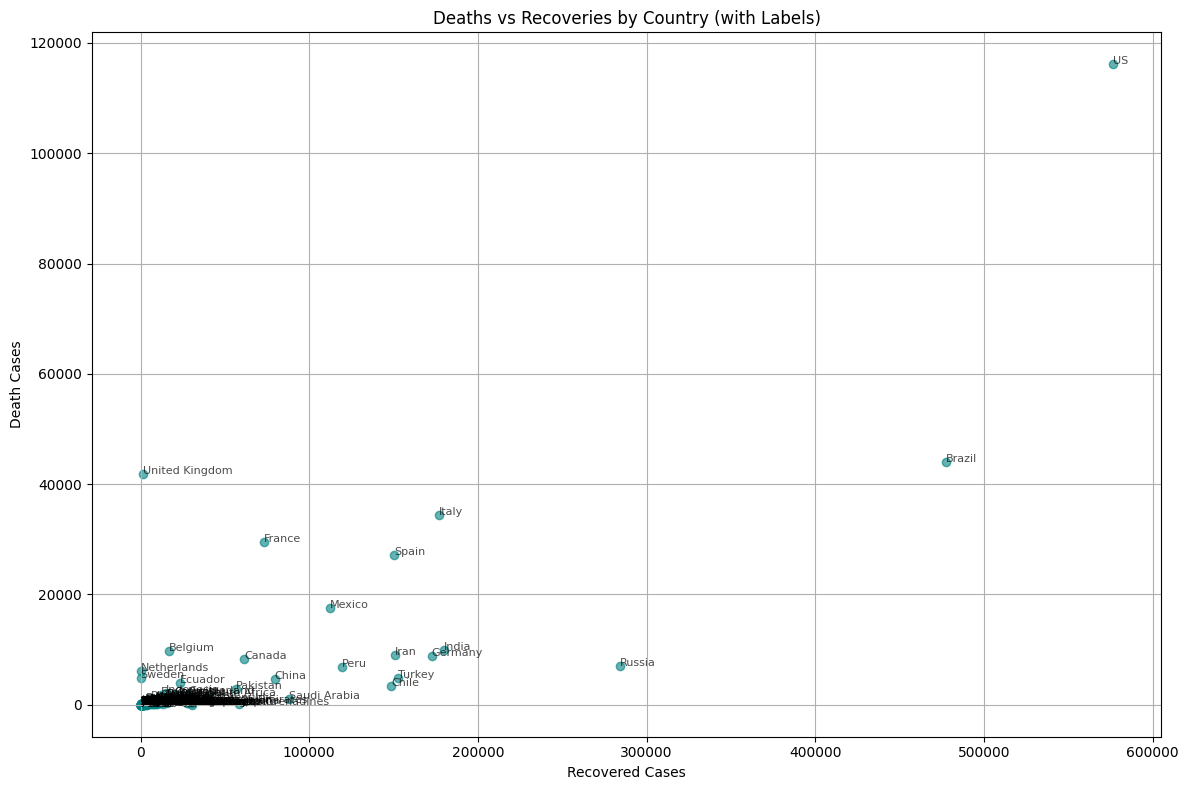

In [73]:

plt.figure(figsize=(12, 8))
plt.scatter(df_compare["Recovered"], df_compare["Deaths"], alpha=0.6, color="teal")

# Her noktaya ülke ismi yaz
for country in df_compare.index:
    x = df_compare.loc[country, "Recovered"]
    y = df_compare.loc[country, "Deaths"]
    plt.text(x, y, country, fontsize=8, alpha=0.7)

plt.title("Deaths vs Recoveries by Country (with Labels)")
plt.xlabel("Recovered Cases")
plt.ylabel("Death Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_18128\3418325800.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("tab20", num_countries)  # tab20 geniş renk paleti


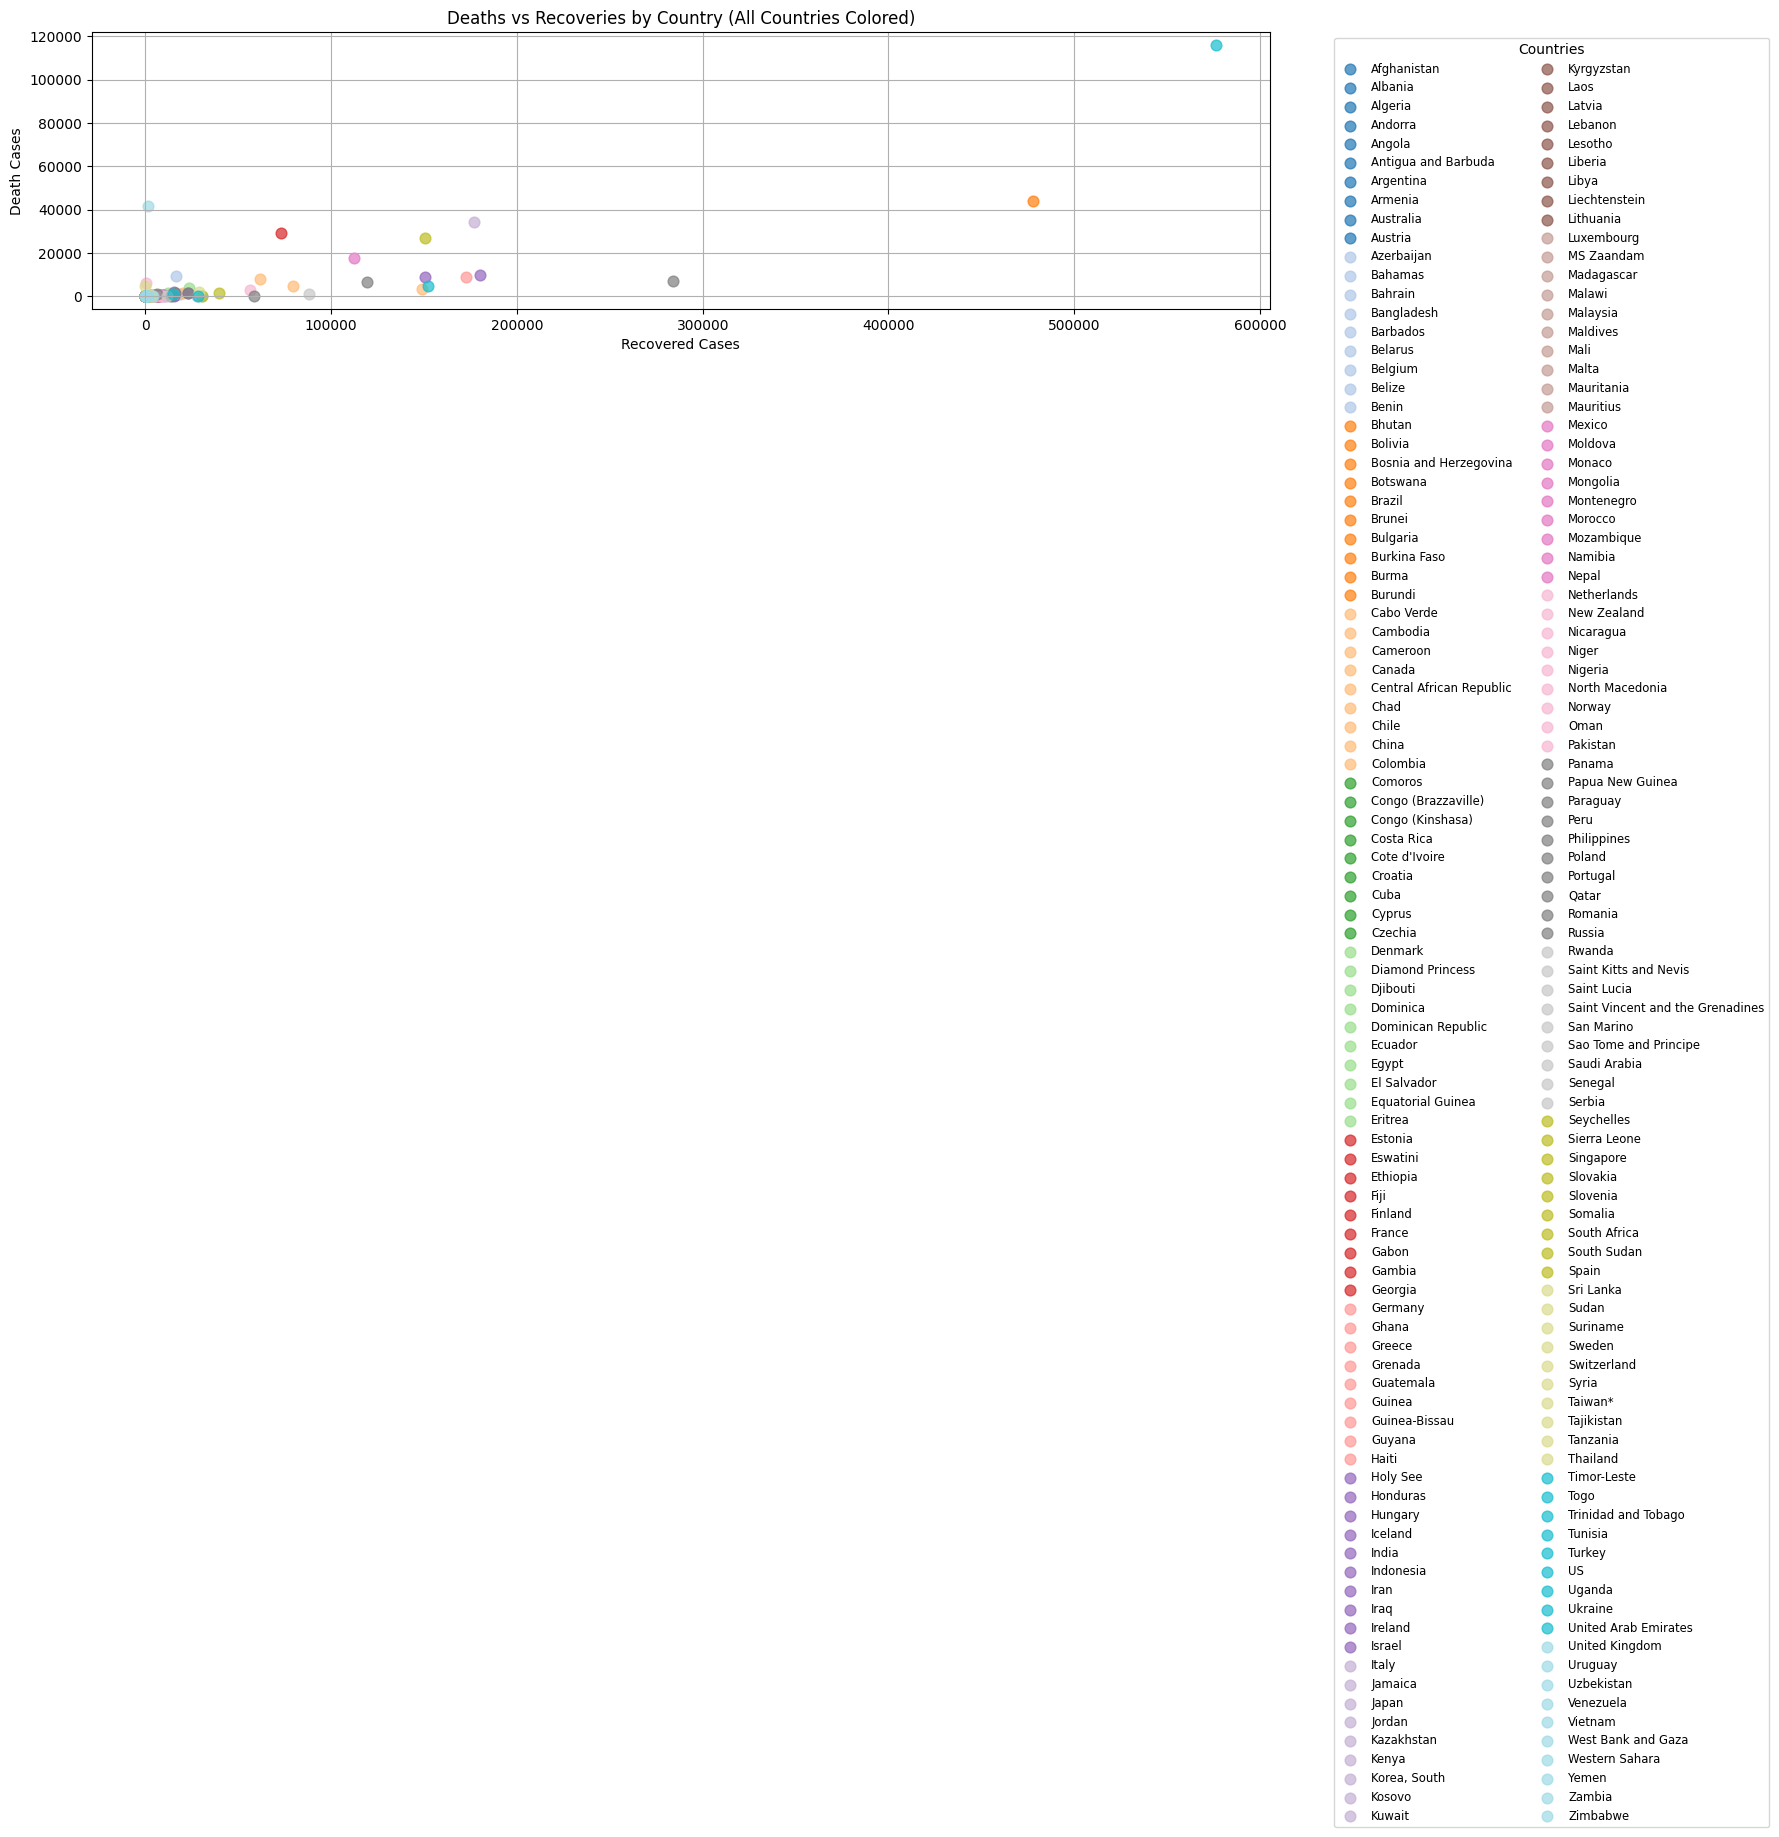

In [76]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Tüm ülke isimleri
countries = df_compare.index.tolist()
num_countries = len(countries)

# Her ülkeye bir renk ata
colors = cm.get_cmap("tab20", num_countries)  # tab20 geniş renk paleti

plt.figure(figsize=(18, 12))

for i, country in enumerate(countries):
    x = df_compare.loc[country, "Recovered"]
    y = df_compare.loc[country, "Deaths"]
    plt.scatter(x, y, color=colors(i), label=country, s=60, alpha=0.7)

plt.title("Deaths vs Recoveries by Country (All Countries Colored)")
plt.xlabel("Recovered Cases")
plt.ylabel("Death Cases")
plt.grid(True)

# Legend çok büyük olmasın diye küçük font ve çok sütun kullan
plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc="upper left", ncol=2, fontsize="small", title_fontsize="medium")

plt.tight_layout()
plt.show()


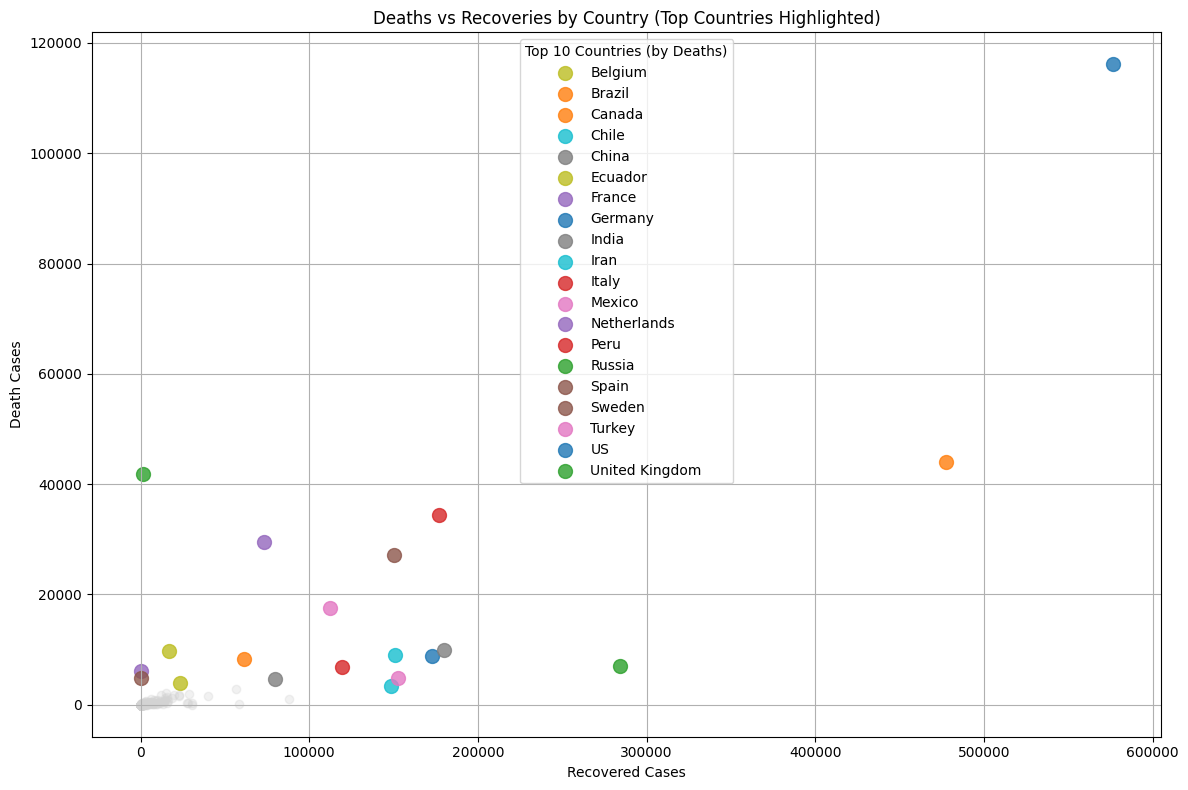

In [77]:

import seaborn as sns

# En yüksek ölüme sahip ilk 20 ülke
top_countries = df_compare.sort_values("Deaths", ascending=False).head(20).index

plt.figure(figsize=(12, 8))

# Renk paleti
palette = sns.color_palette("tab10", len(top_countries))

# Her ülkeyi çiz
for i, country in enumerate(df_compare.index):
    x = df_compare.loc[country, "Recovered"]
    y = df_compare.loc[country, "Deaths"]

    if country in top_countries:
        plt.scatter(x, y, color=palette[list(top_countries).index(country)], label=country, s=100, alpha=0.8)
    else:
        plt.scatter(x, y, color="lightgray", alpha=0.3)

# Legend sadece ilk 10 ülke için
plt.legend(title="Top 10 Countries (by Deaths)")
plt.title("Deaths vs Recoveries by Country (Top Countries Highlighted)")
plt.xlabel("Recovered Cases")
plt.ylabel("Death Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


4. madde

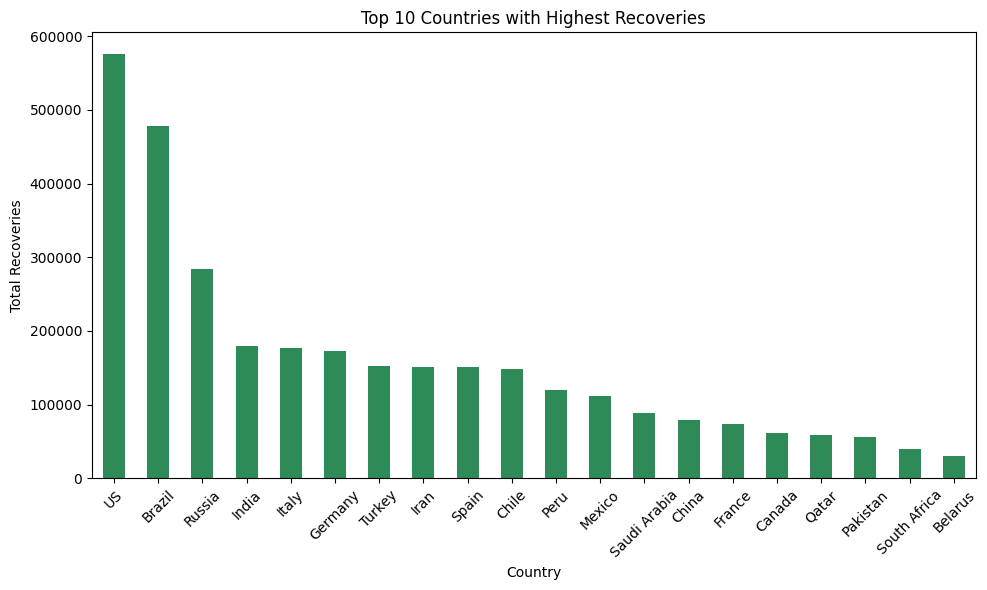

In [ ]:
# Ülke bazında en son iyileşme verisi
total_recovered_by_country = df_recovered.groupby("Country/Region").sum(numeric_only=True).iloc[:, -1].sort_values(ascending=False)

# İlk 20 ülkeyi al
top_20_recovered = total_recovered_by_country.head(20)

# Çizim
plt.figure(figsize=(10,6))
top_20_recovered.plot(kind="bar", color="seagreen")
plt.title("Top 10 Countries with Highest Recoveries")
plt.ylabel("Total Recoveries")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


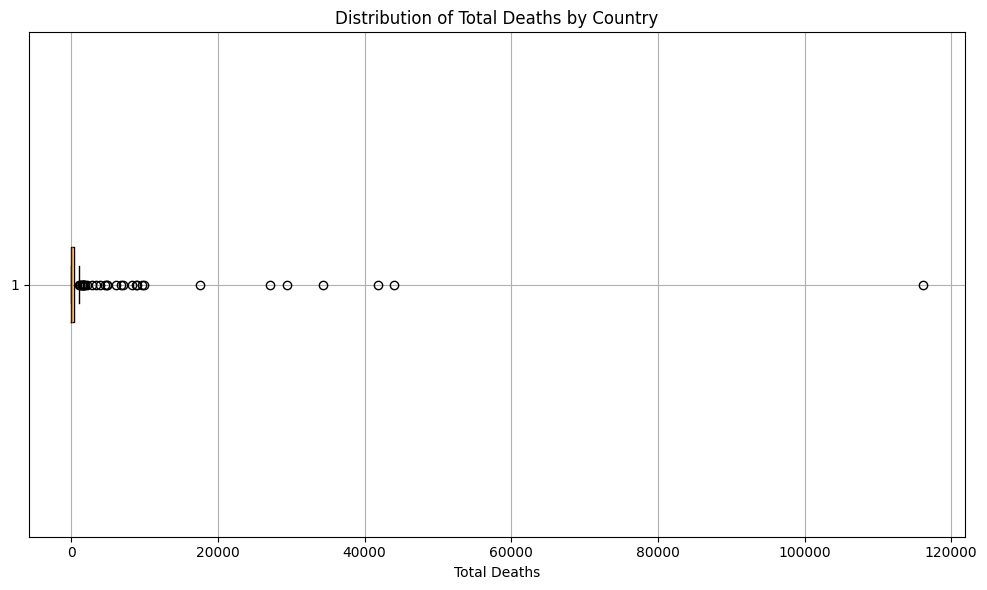

In [80]:
# Ülke bazında toplam ölümler
total_deaths = df_deaths.groupby("Country/Region").sum(numeric_only=True).iloc[:, -1]

# Boxplot ile görselleştirme
plt.figure(figsize=(10,6))
plt.boxplot(total_deaths, vert=False)
plt.title("Distribution of Total Deaths by Country")
plt.xlabel("Total Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()


In [89]:
# IQR yöntemiyle aykırı değerleri tespit et
Q1 = total_deaths.quantile(0.25)
Q3 = total_deaths.quantile(0.75)
IQR = Q3 - Q1

# Aykırı değer sınırları
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri filtrele (üst sınırın üzerinde olanlar)
outliers = total_deaths[total_deaths > upper_bound]

# Sonuçları yazdır
outliers.sort_values(ascending=False)


Country/Region
US                116127
Brazil             43959
United Kingdom     41821
Italy              34371
France             29439
Spain              27136
Mexico             17580
India               9900
Belgium             9661
Iran                8950
Germany             8807
Canada              8228
Russia              7081
Peru                6860
Netherlands         6084
Sweden              4891
Turkey              4825
China               4638
Ecuador             3929
Chile               3362
Pakistan            2839
Indonesia           2198
Switzerland         1939
Colombia            1808
Ireland             1706
Egypt               1672
South Africa        1568
Portugal            1520
Romania             1427
Poland              1256
Bangladesh          1209
Philippines         1098
Name: 6/15/20, dtype: int64

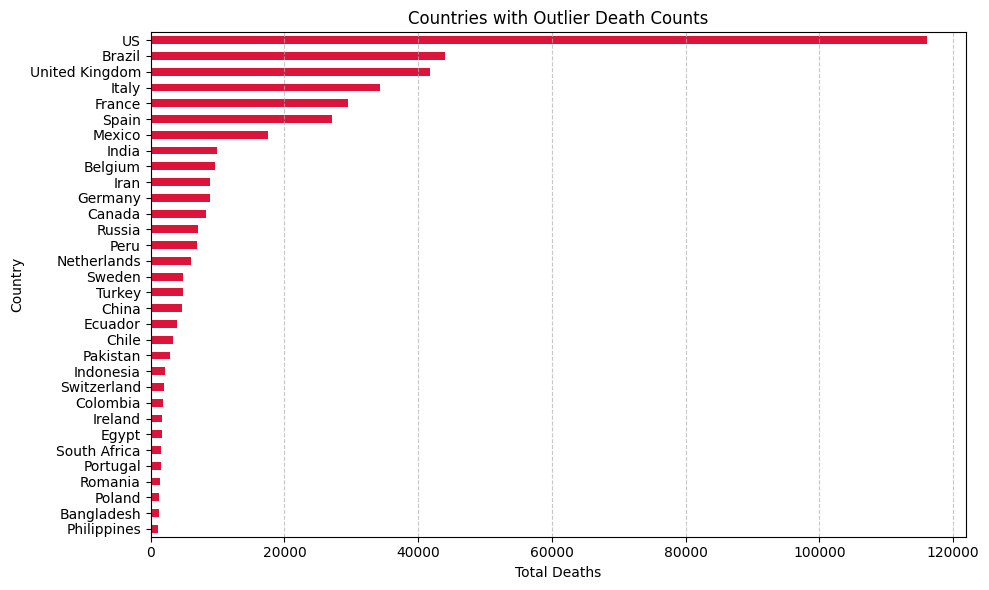

In [90]:
# Aykırı ülkeleri bar grafikle görselleştir
plt.figure(figsize=(10,6))
outliers.sort_values(ascending=True).plot(kind="barh", color="crimson")

plt.title("Countries with Outlier Death Counts")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


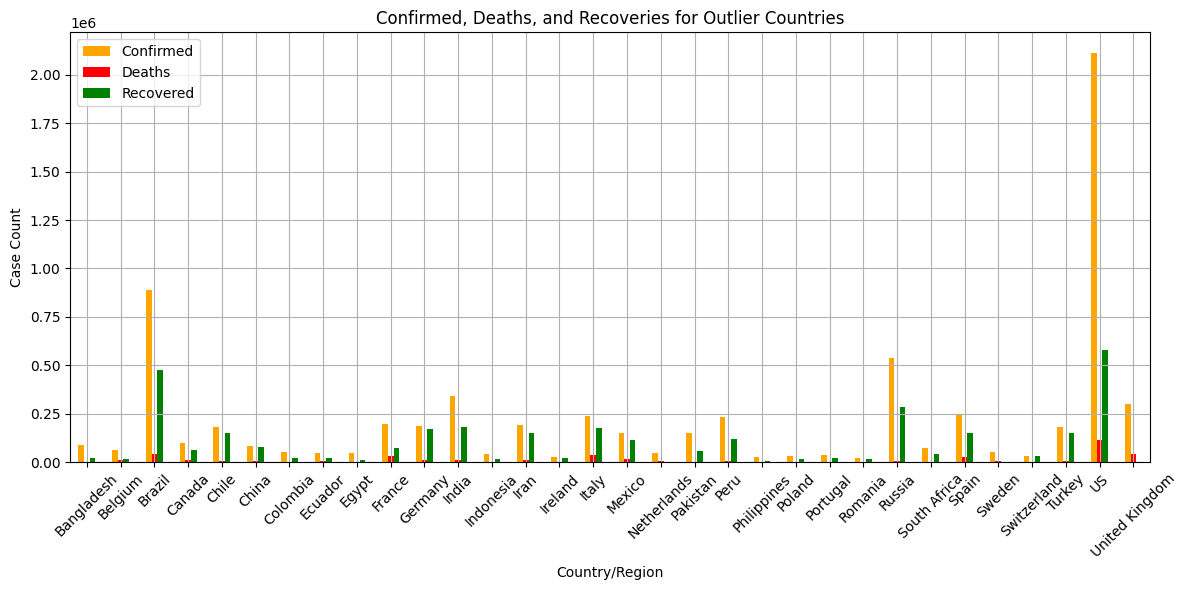

In [91]:
# Aykırı ülkeleri tekrar alalım
Q1 = total_deaths.quantile(0.25)
Q3 = total_deaths.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
outlier_countries = total_deaths[total_deaths > upper_bound].index

# Aykırı ülkelerin toplam vaka ve iyileşme verileri
total_confirmed = df_confirmed.groupby("Country/Region").sum(numeric_only=True).iloc[:, -1]
total_recovered = df_recovered.groupby("Country/Region").sum(numeric_only=True).iloc[:, -1]

# Ortak tablo
df_outliers_compare = pd.DataFrame({
    "Confirmed": total_confirmed[outlier_countries],
    "Deaths": total_deaths[outlier_countries],
    "Recovered": total_recovered[outlier_countries]
}).dropna()

# Görselleştirme
df_outliers_compare.plot(kind="bar", figsize=(12, 6), color=["orange", "red", "green"])
plt.title("Confirmed, Deaths, and Recoveries for Outlier Countries")
plt.ylabel("Case Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


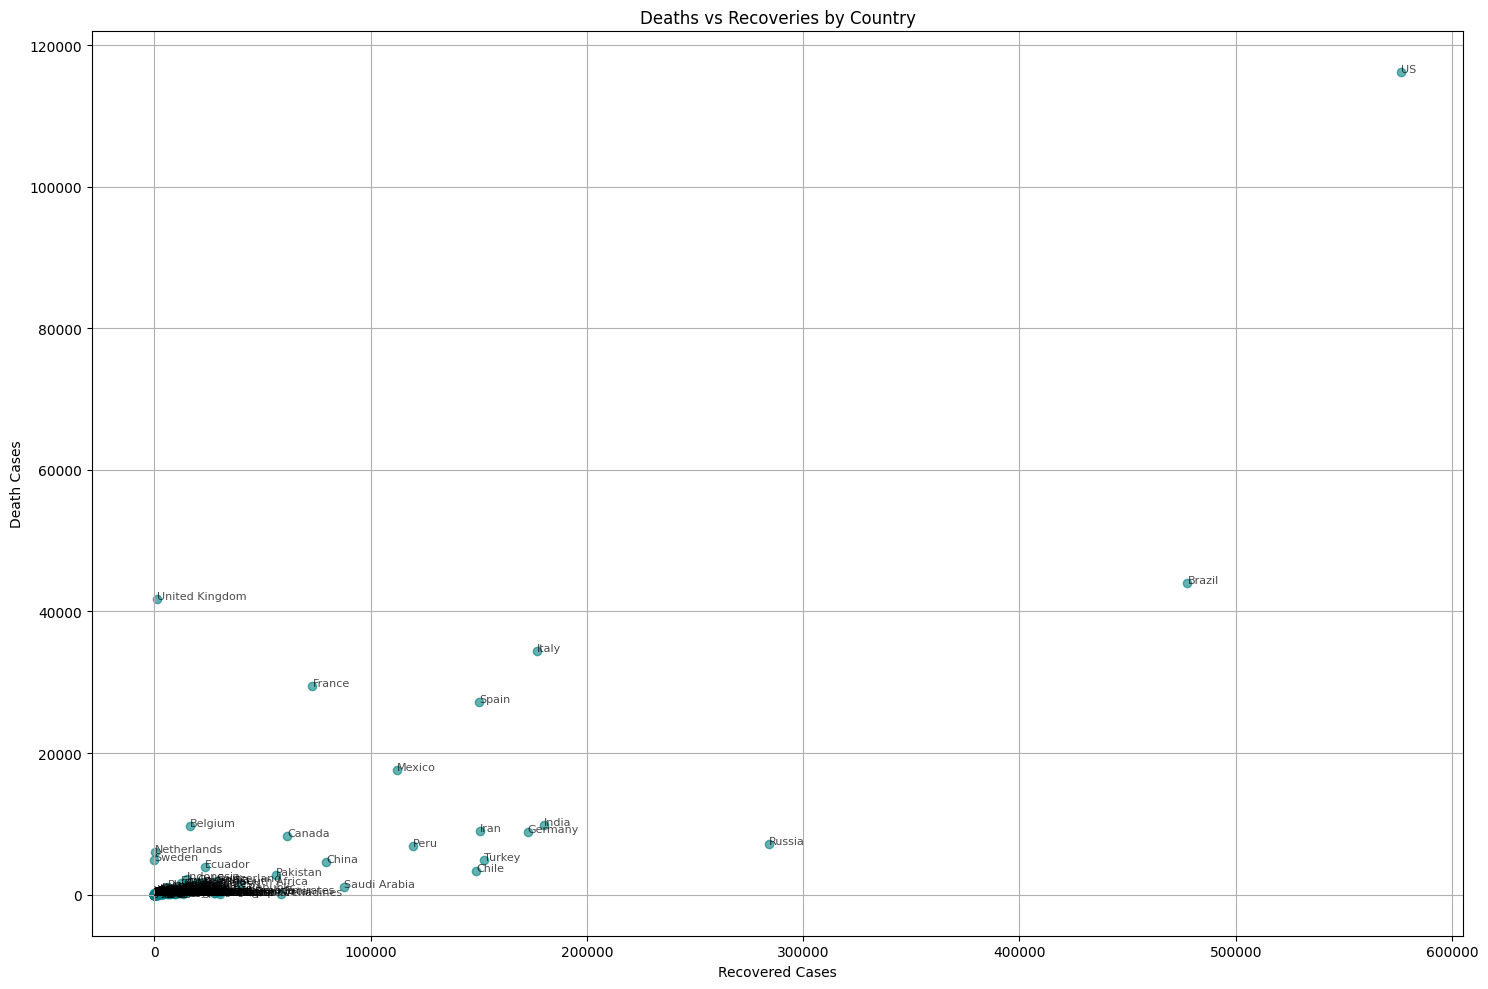

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

# Ülke bazında toplam ölümler ve iyileşmeler (en son tarih)
total_deaths = df_deaths.groupby("Country/Region").sum(numeric_only=True).iloc[:, -1]
total_recovered = df_recovered.groupby("Country/Region").sum(numeric_only=True).iloc[:, -1]

# Ortak ülkeler için DataFrame
df_compare = pd.DataFrame({
    "Deaths": total_deaths,
    "Recovered": total_recovered
}).dropna()

# Grafik çizimi
plt.figure(figsize=(15,10))
plt.scatter(df_compare["Recovered"], df_compare["Deaths"], alpha=0.6, color="teal")

# Her noktaya ülke isimlerini yaz
for country, row in df_compare.iterrows():
    plt.text(row["Recovered"], row["Deaths"], country, fontsize=8, alpha=0.7)

plt.title("Deaths vs Recoveries by Country")
plt.xlabel("Recovered Cases")
plt.ylabel("Death Cases")
plt.grid(True)
plt.tight_layout()
plt.show()
